In [11]:
import pandas as pd

df = pd.read_csv("lens-export.csv", on_bad_lines='skip')

In [12]:
df.head()

,#,Jurisdiction,Kind,Lens ID,Publication Year,Title,Abstract,Applicants,Inventors,Owners,Cited by Patent Count
0,1,JP,A,049-681-122-296-423,2023,"QUANTUM COMPUTING PROGRAM, QUANTUM COMPUTING A...",To obtain a solution even when the coefficient...,NAT UNIV YOKOHAMA,ISHIKAWA NAOKI;;NORIMOTO MASAYA,NaN,0
1,2,WO,A1,123-922-201-955-171,2023,"QUANTUM CIRCUIT, QUANTUM COMPUTING ELEMENT, QU...","Provided are a quantum circuit, a quantum comp...",AIST,SAIDA DAISUKE,NaN,0
2,3,US,A1,113-413-730-236-721,2024,"QUANTUM CIRCUIT, QUANTUM COMPUTING ELEMENT, QU...","Provided is a quantum circuit, a quantum compu...",AIST,SAIDA DAISUKE,NATIONAL INSTITUTE OF ADVANCED INDUSTRIAL SCIE...,0
3,4,WO,A1,082-130-262-393-909,2023,"QUANTUM COMPUTING DEVICE, QUANTUM COMPUTING SY...",This quantum computing device in a quantum com...,NIPPON TELEGRAPH & TELEPHONE,MISHCHENKO PETR;;KUSAGAWA KEITA,NaN,0
4,5,WO,A1,133-599-584-843-016,2024,"QUANTUM COMPUTING SYSTEM, QUANTUM COMPUTING DE...",A quantum computing system according to one as...,NIPPON TELEGRAPH & TELEPHONE,YAMAMOTO KAORU;;ENDO SUGURU;;SUZUKI YASUNARI;;...,NaN,0


In [13]:
df = df.drop(["Owners", 'Cited by Patent Count', "Lens ID", "Kind"], axis =1)

In [14]:
df.head()

,#,Jurisdiction,Publication Year,Title,Abstract,Applicants,Inventors
0,1,JP,2023,"QUANTUM COMPUTING PROGRAM, QUANTUM COMPUTING A...",To obtain a solution even when the coefficient...,NAT UNIV YOKOHAMA,ISHIKAWA NAOKI;;NORIMOTO MASAYA
1,2,WO,2023,"QUANTUM CIRCUIT, QUANTUM COMPUTING ELEMENT, QU...","Provided are a quantum circuit, a quantum comp...",AIST,SAIDA DAISUKE
2,3,US,2024,"QUANTUM CIRCUIT, QUANTUM COMPUTING ELEMENT, QU...","Provided is a quantum circuit, a quantum compu...",AIST,SAIDA DAISUKE
3,4,WO,2023,"QUANTUM COMPUTING DEVICE, QUANTUM COMPUTING SY...",This quantum computing device in a quantum com...,NIPPON TELEGRAPH & TELEPHONE,MISHCHENKO PETR;;KUSAGAWA KEITA
4,5,WO,2024,"QUANTUM COMPUTING SYSTEM, QUANTUM COMPUTING DE...",A quantum computing system according to one as...,NIPPON TELEGRAPH & TELEPHONE,YAMAMOTO KAORU;;ENDO SUGURU;;SUZUKI YASUNARI;;...


In [15]:
print(df["Jurisdiction"].value_counts())

Jurisdiction
US    34180
WO     6990
EP     4081
CN     3737
AU      351
CA      180
GB      141
KR      102
JP       88
IL       28
DE       22
RU       21
FR       20
NL       18
MX       12
TW       10
ES        5
BG        2
PL        2
SE        2
PT        2
NZ        1
SA        1
HK        1
ZA        1
LU        1
IT        1
Name: count, dtype: int64


In [23]:
jurisdiction_map = {
    "US": "United States",
    "WO": "WIPO (International - PCT)",
    "EP": "European Patent Office",
    "CN": "China",
    "AU": "Australia",
    "CA": "Canada",
    "GB": "European Patent Office",
    "KR": "South Korea",
    "JP": "Japan",
    "IL": "Israel",
    "DE": "European Patent Office",
    "RU": "Russia",
    "FR": "European Patent Office",
    "NL": "European Patent Office",
    "MX": "Mexico",
    "TW": "Taiwan",
    "ES": "European Patent Office",
    "BG": "European Patent Office",
    "PL": "European Patent Office",
    "SE": "European Patent Office",
    "PT": "European Patent Office",
    "NZ": "New Zealand",
    "SA": "Saudi Arabia",
    "HK": "Hong Kong",
    "ZA": "South Africa",
    "LU": "European Patent Office",
    "IT": "European Patent Office"
}


european_countries = ["GB", "DE", "FR", "NL", "ES", "BG", "PL", "SE", "PT", "LU", "IT"]


df["Country"] = df["Jurisdiction"].map(jurisdiction_map)

df["Country"] = df["Country"].str.title()


print(df["Country"])

0                             Japan
1        Wipo (International - Pct)
2                     United States
3        Wipo (International - Pct)
4        Wipo (International - Pct)
                    ...            
49995                 United States
49996                 United States
49997                 United States
49998                 United States
49999                 United States
Name: Country, Length: 50000, dtype: object


What is important to see is that we can use Europe as an overall understanding to what s happening in europe. The rest are basically outliers with a count of like 100 patents in total regsitered in some other juridisctions;

For this reason I will merge them toghetger with european patent office;

In [24]:
print(df["Country"].value_counts())

Country
United States                 34180
Wipo (International - Pct)     6990
European Patent Office         4297
China                          3737
Australia                       351
Canada                          180
South Korea                     102
Japan                            88
Israel                           28
Russia                           21
Mexico                           12
Taiwan                           10
Saudi Arabia                      1
New Zealand                       1
South Africa                      1
Hong Kong                         1
Name: count, dtype: int64


In [36]:
df  = df.drop(["Jurisdiction"], axis =1 )

In [27]:
df = df.dropna()

In [33]:
df["Inventors"] = df["Inventors"].str.split(";;")
df["Applicants"] = df["Applicants"].str.split(";;")

In [34]:
import re

def clean_abstract(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r"[^\w\s]", " ", text)
    text = re.sub(r"\s+", " ", text)
    text = text.strip()
    return text


df["Abstract"] = df["Abstract"].apply(clean_abstract)

In [37]:
df.head()

,#,Publication Year,Title,Abstract,Applicants,Inventors,Country
0,1,2023,"QUANTUM COMPUTING PROGRAM, QUANTUM COMPUTING A...",to obtain a solution even when the coefficient...,[NAT UNIV YOKOHAMA],"[ISHIKAWA NAOKI, NORIMOTO MASAYA]",Japan
1,2,2023,"QUANTUM CIRCUIT, QUANTUM COMPUTING ELEMENT, QU...",provided are a quantum circuit a quantum compu...,[AIST],[SAIDA DAISUKE],Wipo (International - Pct)
2,3,2024,"QUANTUM CIRCUIT, QUANTUM COMPUTING ELEMENT, QU...",provided is a quantum circuit a quantum comput...,[AIST],[SAIDA DAISUKE],United States
3,4,2023,"QUANTUM COMPUTING DEVICE, QUANTUM COMPUTING SY...",this quantum computing device in a quantum com...,[NIPPON TELEGRAPH & TELEPHONE],"[MISHCHENKO PETR, KUSAGAWA KEITA]",Wipo (International - Pct)
4,5,2024,"QUANTUM COMPUTING SYSTEM, QUANTUM COMPUTING DE...",a quantum computing system according to one as...,[NIPPON TELEGRAPH & TELEPHONE],"[YAMAMOTO KAORU, ENDO SUGURU, SUZUKI YASUNARI,...",Wipo (International - Pct)


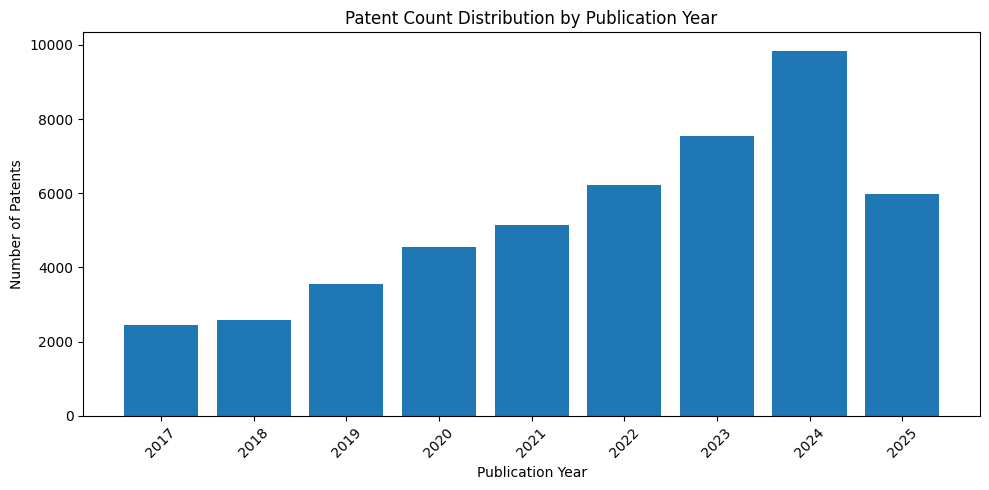

In [38]:
import matplotlib.pyplot as plt

year_counts = df["Publication Year"].value_counts().sort_index()


plt.figure(figsize=(10, 5))
plt.bar(year_counts.index.astype(str), year_counts.values)
plt.xlabel("Publication Year")
plt.ylabel("Number of Patents")
plt.title("Patent Count Distribution by Publication Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
df.to_csv("cleaned_patents(not_labeled).csv", index=False)